<a href="https://colab.research.google.com/github/juonio/juonio/blob/main/Copy_of_Youtube_External_Litchi_Transformation_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Circle Measure.csv to Circle Measure.csv
Please enter desired minimum altitude in meters: 10
Please enter desired inclination angle from 0 - 180 degrees(click enter to use original): 12.5
Please enter desired CW rotation angle from 0 - 360 degrees(click enter to use original): 12.5
Please enter new latitude position for flight path(click enter to use original): 
Please enter new longitude position for flight path(click enter to use original): 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading: Circle Measure_10.0m_12.5°incline_12.5°rotation.csv
Thank you for using Litchi Transformation Tool! ~Allan


<function matplotlib.pyplot.show(*args, **kw)>

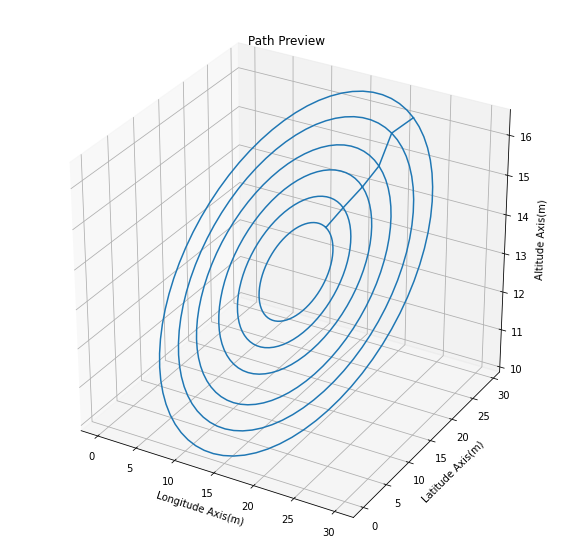

In [9]:
#@title

import io
import numpy as np
import pandas as pd
from google.colab import files

file_name = files.upload()
for fn in file_name.keys():
  csv_df = pd.read_csv(io.StringIO(file_name[fn].decode('utf-8')))

if csv_df.columns[2] == 'altitude(m)' : 
    des_min_alt = input('Please enter desired minimum altitude in meters: ')
    des_min_alt = float(des_min_alt)
    alt_conv_factor = 110947.2
    alt_type = 'm'

elif csv_df.columns[2] == 'altitude(ft)' : 
    des_min_alt = input('Please enter desired minimum altitude in feet: ')
    des_min_alt = float(des_min_alt)
    alt_conv_factor = 364000.0
    alt_type = 'ft'

else :
    print('Error with input file!')

def min_x_delta(x):
    delta = x - x.min()
    return delta

orig_min_lat = csv_df['latitude'].min()
orig_max_lat = csv_df['latitude'].max()
orig_min_lon = csv_df['longitude'].min()
orig_max_lon = csv_df['longitude'].max()

orig_lat_deltas = min_x_delta(csv_df['latitude'])
orig_lon_deltas = min_x_delta(csv_df['longitude'])

orig_lat_cntr = (orig_min_lat + orig_max_lat) / 2 
orig_lon_cntr = (orig_min_lon + orig_max_lon) / 2 

incln_ang_deg = input('Please enter desired inclination angle from 0 - 180 degrees(click enter to use original): ')
if len(incln_ang_deg) < 1:
    incln_ang_deg = 0
    incln_ang_rad = np.radians(incln_ang_deg)
else:
    incln_ang_deg = float(incln_ang_deg)
    incln_ang_rad = np.radians(incln_ang_deg)

def incln_alt_values(lat): 
    x = orig_lat_deltas * np.sin(incln_ang_rad)
    incln_conv_alt = x * alt_conv_factor
    incln_output_alt = incln_conv_alt + des_min_alt
    return incln_output_alt

def incln_lat_values(lat): 
    x = orig_lat_deltas * np.cos(incln_ang_rad)
    incln_output_lat = x + orig_min_lat
    return incln_output_lat

if csv_df.columns[2] == 'altitude(m)' : 
    csv_df['altitude(m)'] = incln_alt_values(csv_df['latitude'])

elif csv_df.columns[2] == 'altitude(ft)' : 
    csv_df['altitude(ft)'] = incln_alt_values(csv_df['latitude'])
    
csv_df['latitude'] = incln_lat_values(csv_df['latitude'])

rot_ang_deg = input('Please enter desired CW rotation angle from 0 - 360 degrees(click enter to use original): ')
if len(rot_ang_deg) < 1:
    rot_ang_deg = 0
    rot_ang_rad = np.radians(rot_ang_deg)
else: 
    rot_ang_deg = float(rot_ang_deg)
    rot_ang_rad = np.radians(rot_ang_deg)

new_lat_cntr = input('Please enter new latitude position for flight path(click enter to use original): ')
if len(new_lat_cntr) < 1:
    new_lat_cntr = orig_lat_cntr
else:
    new_lat_cntr = float(new_lat_cntr)
        
new_lon_cntr = input('Please enter new longitude position for flight path(click enter to use original): ')
if len(new_lon_cntr) < 1:
    new_lon_cntr = orig_lon_cntr
else: 
    new_lon_cntr = float(new_lon_cntr)

mnte_of_lon_orig = 2 * np.pi * 6371000 * np.sin(np.radians(90 - np.abs(orig_lat_cntr))) / (360 * 60)
mnte_of_lon_new = 2 * np.pi * 6371000 * np.sin(np.radians(90 - np.abs(new_lat_cntr))) / (360 * 60)
mnte_of_lat = 2 * np.pi * 6371000 * np.sin(np.radians(90)) / (360 * 60)

orig_ref_dist = (csv_df['longitude'] - orig_lon_cntr) * 60 * mnte_of_lon_orig # in meters
new_ref_dist = orig_ref_dist / (60 * mnte_of_lon_new) # in degrees

def rot_lon_values(lon, lat): # CW
    x = lon * np.cos(rot_ang_rad) # longitude
    y = lat * np.sin(rot_ang_rad) # latitude
    return ((x + y) / mnte_of_lon_new) + new_lon_cntr
            
def rot_lat_values(lon, lat): # CW
    x = lon * -np.sin(rot_ang_rad) # longitude
    y = lat * np.cos(rot_ang_rad) # latitude
    return ((x + y) / mnte_of_lat) + new_lat_cntr

new_lon_values = rot_lon_values((new_ref_dist) * mnte_of_lon_new, (csv_df['latitude'] - orig_lat_cntr) * mnte_of_lat)
new_lat_values = rot_lat_values((new_ref_dist) * mnte_of_lon_new, (csv_df['latitude'] - orig_lat_cntr) * mnte_of_lat)

csv_df['longitude'] = new_lon_values 
csv_df['latitude'] = new_lat_values 

output_file_name = fn.rsplit( ".", 1 )[0] + '_' + str(des_min_alt) + str(alt_type) + '_' + str(incln_ang_deg) + '°incline_' + str(rot_ang_deg) + '°rotation.csv'
csv_df.to_csv(output_file_name, index = False)
files.download(output_file_name)

print('Downloading:', output_file_name)
print('Thank you for using Litchi Transformation Tool! ~Allan')

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

%matplotlib inline 

plt.rcParams['figure.figsize'] = (10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

if csv_df.columns[2] == 'altitude(m)' :
    x = (min_x_delta(csv_df['longitude']) * mnte_of_lon_new * 60) 
    y = (min_x_delta(csv_df['latitude']) * mnte_of_lat * 60)
    z = np.array(csv_df['altitude(m)'], csv_df['altitude(m)'])
    ax.set_xlabel('Longitude Axis(m)')
    ax.set_ylabel('Latitude Axis(m)')
    ax.set_zlabel('Altitude Axis(m)')

elif csv_df.columns[2] == 'altitude(ft)' : 
    x = (min_x_delta(csv_df['longitude']) * (mnte_of_lon_new * 3.28084) * 60) 
    y = (min_x_delta(csv_df['latitude']) * (mnte_of_lat * 3.28084) * 60)
    z = np.array(csv_df['altitude(ft)'], csv_df['altitude(ft)'])
    ax.set_xlabel('Longitude Axis(ft)')
    ax.set_ylabel('Latitude Axis(ft)')
    ax.set_zlabel('Altitude Axis(ft)')

ax.plot(x, y, z)
plt.title('Path Preview')

plt.show

# **^ Litchi Transformation Tool (updated 7-6-2020)**

![alt text](https://i.imgur.com/RV3U5uHm.png)![alt text](https://i.imgur.com/tNFF2hRm.png)


**Please follow steps 1-6 for use of this notebook**

---

1.   Click "File" above and select "Save a copy in Drive".

---


2.   In the copy, click "File" above and select "Open in playground mode".

---


3. Select the bar that says "SHOW CODE" above and click the play button that appears on the left side of the bar:

![alt text](https://i.imgur.com/0h6YUPg.png)

![alt text](https://i.imgur.com/N6zVbZ3.png)

---


4.   Click the "Choose Files" button when it appears to select the Litchi .csv file you would like to transform:

![alt text](https://i.imgur.com/i5jXzaW.png)

---

5.   For each parameter prompt, input your desired transformation value in the corresponding text field, and then press enter after each:

![alt text](https://i.imgur.com/MSon5MU.png)

---

6.   After you enter all transformation parameters, the transformed .csv file will download automatically and a preview of the path will be generated:

![alt text](https://i.imgur.com/HMPJHNJ.png)






MIT License applied to: "External_Litchi_Transformation_Tool.ipynb"

Copyright (c) 2020 Allan Austria

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.